## Binary Prediction of Smoker Status using Bio-Signals  
## Biyo-Sinyaller ile Sigara Kullanım Durumu Tahmini

---

## Giriş

Bu proje, bireylerin biyolojik sinyallerine bakarak sigara kullanıp kullanmadıklarını tahmin etmeyi amaçlayan bir makine öğrenmesi sınıflandırma çalışmasıdır. Amaç, sağlık verileri üzerinden davranışsal bir durumu öngörebilen hızlı ve tekrarlanabilir bir model pipeline’ı kurmaktır.

Proje Kaggle Playground yarışması kapsamında hazırlanmış olup uçtan uca bir sınıflandırma pipeline’ı içermektedir.

---

## Veri Tanımı ve Amaç

Veri seti bireylere ait çeşitli biyometrik ve sağlık ölçümlerini içermektedir. Her satır bir kişiyi temsil eder ve hedef değişken kişinin sigara kullanıp kullanmadığını gösterir.

**Hedef değişken:** sigara kullanım durumu (binary)

Amaç:

- sigara kullanımını biyolojik sinyallerden tahmin etmek  
- sağlık verileri üzerinden risk analizi yapmak  
- hızlı ve stabil bir ML pipeline kurmak  
- Kaggle submission üretmek  

Bu problem bir **binary classification** problemidir.

---

## Workflow / İş Akışı

- Data Loading / Veri Yükleme  
- Exploratory Data Analysis / Keşifsel Veri Analizi  
- Feature Engineering / Özellik Mühendisliği  
- Model Training / Model Eğitimi  
- Submission & Model Saving / Submission ve Model Kaydetme  


In [1]:
from IPython.display import Image, display

In [2]:
display(Image(url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQtMREkvoSgQN0WrDzfsaAGNO9IRVH736vGKQ&s', width=700))

## Libraries / Kullanılacak Kütüphaneler

Bu projede veri işleme, görselleştirme ve modelleme için temel Python veri bilimi kütüphaneleri kullanılmaktadır. Amaç hafif, stabil ve tekrar üretilebilir bir pipeline kurmaktır.

- pandas → veri yükleme ve tablo işlemleri  
- numpy → sayısal hesaplamalar  
- matplotlib & seaborn → veri görselleştirme  
- scikit-learn → modelleme ve değerlendirme  
- joblib → model kaydetme  
- streamlit → demo arayüzü  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import joblib
import warnings
warnings.filterwarnings("ignore")

## 1. Data Loading / Veri Yükleme

Bu aşamada eğitim ve test veri setleri okunur, veri boyutları kontrol edilir ve dosyaların doğru şekilde yüklendiği doğrulanır. Amaç pipeline için temiz bir başlangıç sağlamaktır.


In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [6]:
train.shape

(159256, 24)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [8]:
train.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [10]:
train.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


## 2. Exploratory Data Analysis (EDA) / Keşifsel Veri Analizi

Veri seti bireylerin yaş, boy, kilo, kan değerleri ve çeşitli biyometrik ölçümlerini içermektedir. Her satır bir kişiyi temsil eder ve hedef değişken olan **smoking**, kişinin sigara kullanıp kullanmadığını gösterir.

Tüm değişkenler sayısal yapıdadır ve bu durum modeli doğrudan eğitmemize olanak tanır. `id` sütunu yalnızca kimlik bilgisidir ve tahmin için bilgi taşımaz, bu nedenle model aşamasında çıkarılacaktır.

EDA aşamasında hedef değişken dağılımı ve özellikler arası ilişkiler incelenerek veri yapısının dengesi ve tutarlılığı kontrol edilir.


#### Target Distrubition

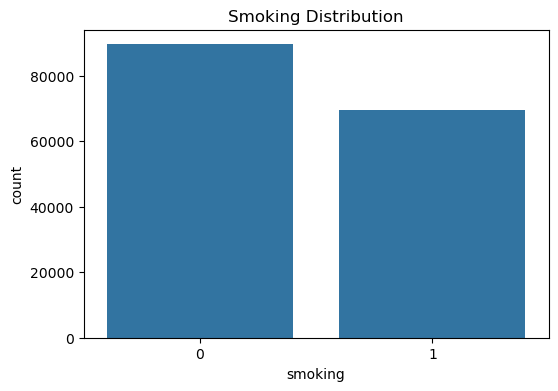

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x=train["smoking"])
plt.title("Smoking Distribution")
plt.show()

#### Correlation Heatmap

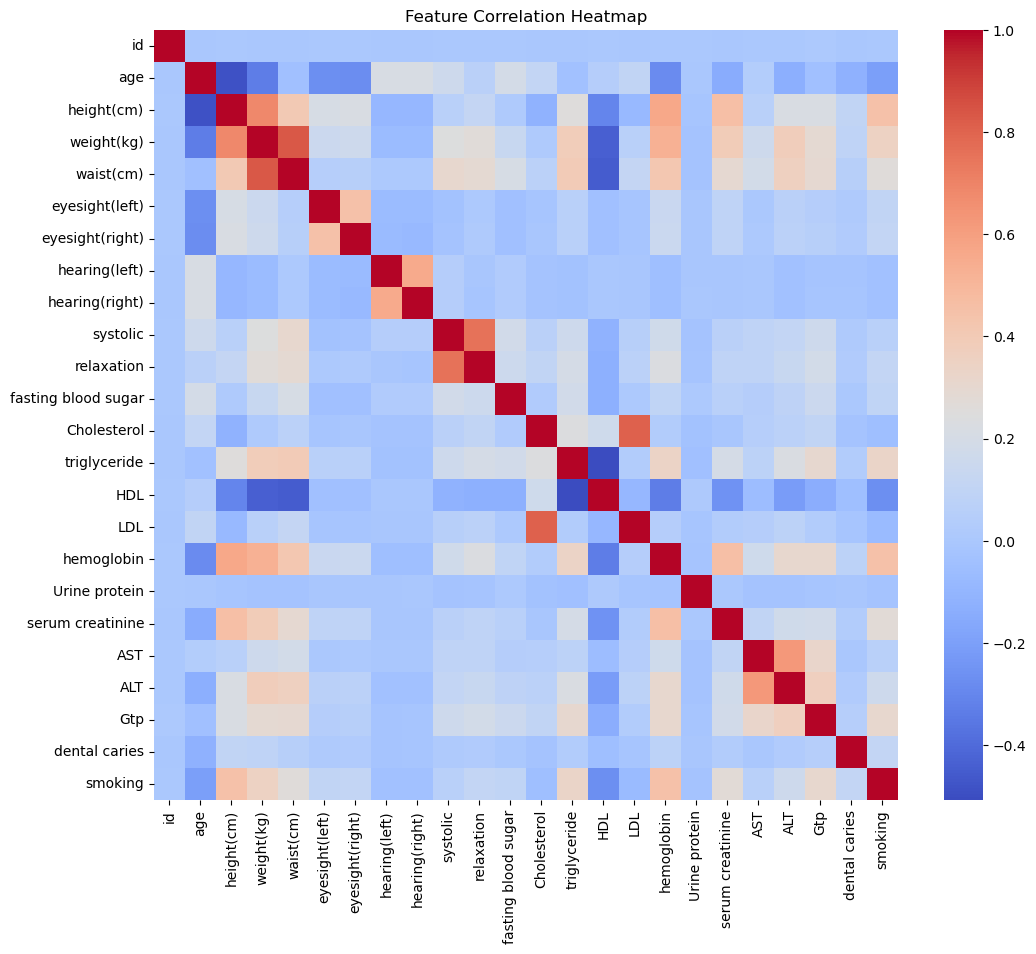

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

**** Grafikler incelendiğinde hedef değişken olan sigara kullanımının veri setinde tamamen tek taraflı olmadığı ve model eğitimi için yeterli dağılıma sahip olduğu görülmektedir. Bu durum modelin her iki sınıfı da öğrenebilmesini sağlar.

Korelasyon haritası bazı biyometrik ölçümlerin sigara kullanımı ile daha güçlü ilişkiler taşıyabileceğini göstermektedir. Özellikle kan değerleri, hemoglobin ve metabolik ölçümler davranışsal sağlık göstergeleri ile bağlantılı olabilir.

Değişkenler arasında aşırı yüksek korelasyon bulunmaması model için ciddi bir çoklu bağlantı problemi olmadığını gösterir. Genel olarak veri yapısı tutarlı ve modelleme için uygundur.


## 3. Feature Engineering / Özellik Mühendisliği

Bu aşamada model için gereksiz sütunlar kaldırılır ve eğitim verisi hazırlanır. Veri tamamen sayısal olduğu için ek encoding veya ölçekleme gerekmez. Ağaç tabanlı modeller farklı ölçeklerde stabil çalışabilir.

`id` sütunu yalnızca kimlik bilgisidir ve tahmin gücü taşımadığı için çıkarılır. Hedef değişken ayrıştırılarak özellik matrisi oluşturulur.

Amaç modeli besleyecek temiz bir veri yapısı hazırlamaktır.


#### Id Sütununu Çıkarıyoruz

In [13]:
train = train.drop(columns=["id"])
test_ids = test["id"]
test = test.drop(columns=["id"])

#### Hedef Değişken Üretiyoruz

In [14]:
X = train.drop(columns=["smoking"])
y = train["smoking"]

In [16]:
X.shape

(159256, 22)

In [17]:
y.shape

(159256,)

**** Feature engineering sonrasında veri başarıyla ayrıştırılmıştır.

- 159256 gözlem  
- 22 özellik  
- 159256 hedef değeri  

Her gözlem için karşılık gelen bir hedef değişken bulunmaktadır ve veri kaybı yaşanmamıştır. Bu yapı model eğitimi için tutarlı ve hazır durumdadır.


## 4. Model Training / Model Eğitimi

Bu aşamada veri eğitim ve doğrulama setlerine ayrılır ve baseline bir Random Forest sınıflandırma modeli eğitilir. Amaç hızlı, stabil ve referans alınabilecek bir başlangıç modeli oluşturmaktır.

Model performansı doğrulama seti üzerinde ölçülerek pipeline’ın doğru çalıştığı kontrol edilir.


In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
val_preds = model.predict(X_val)
acc = accuracy_score(y_val, val_preds)

In [23]:
acc

0.7705638578425217

Doğrulama sonucunda model yaklaşık **%77 doğruluk** elde etmiştir. Bu değer baseline bir model için makul bir başlangıç performansıdır ve pipeline’ın doğru çalıştığını göstermektedir.


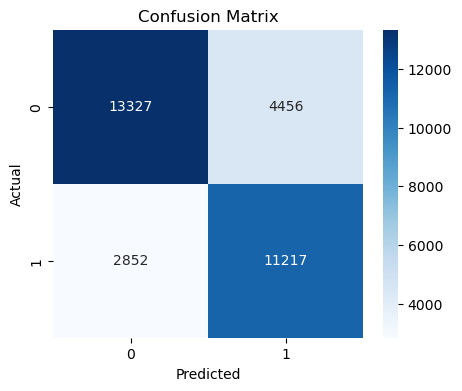

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, val_preds)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 5. Submission & Model Saving / Submission ve Model Kaydetme

Bu aşamada model test verisi üzerinde tahmin üretir ve Kaggle submission dosyası hazırlanır. Aynı zamanda eğitilen model diske kaydedilir.

Amaç pipeline’ı uçtan uca tamamlamak ve tekrar kullanılabilir bir çıktı üretmektir.


In [25]:
sample = pd.read_csv("sample_submission.csv")

test_preds = model.predict(test)

submission = sample.copy()
submission["smoking"] = test_preds

submission.to_csv("submission.csv", index=False)

submission.head()
print('submission hazır')


submission hazır


In [26]:
joblib.dump(model, "smoker_model.pkl")
print('smoker_model.pkl hazır')

smoker_model.pkl hazır


## Sonuç

Bu projede biyometrik sağlık verilerinden sigara kullanım durumunu tahmin eden uçtan uca bir makine öğrenmesi pipeline’ı geliştirilmiştir. Veri analizi, feature engineering, model eğitimi ve değerlendirme adımları sistematik bir şekilde uygulanmıştır.

Baseline Random Forest modeli doğrulama setinde yaklaşık %77 doğruluk elde etmiştir. Bu sonuç, biyolojik sinyallerin davranışsal sağlık göstergelerini tahmin etmede anlamlı bilgi taşıdığını göstermektedir.

Kurulan yapı, ileri model geliştirme ve optimizasyon çalışmaları için sağlam bir temel sunmaktadır.


## Gerçek Hayat Senaryosu

Bu tür bir model sağlık taramaları ve erken risk analiz sistemlerinde kullanılabilir. Biyometrik ölçümler üzerinden sigara kullanımını tahmin etmek, bireylerin sağlık risklerini erken aşamada belirlemeye yardımcı olabilir.

Bu yaklaşım:

- önleyici sağlık politikalarını destekler  
- riskli davranışların erken tespitini sağlar  
- veri temelli sağlık analitiğini güçlendirir  

Makine öğrenmesi destekli analizler, sağlık sektöründe karar destek sistemlerinin gelişimine katkı sağlar.
